<a href="https://colab.research.google.com/github/MontanezQuirozRolo/Amex-Default-Prediction/blob/main/Analisis_Amex_Default_Predictionl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Amex Default Prediction

In [ ]:
# Carga de librerias que se usaran

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga de librerias para conectarse a kaggel

#!pip install opendatasets
#import opendatasets as od

# 1. Carga de datos

In [ ]:
# Conexion a Kaggel

#dataset_link = 'https://www.kaggle.com/competitions/amex-default-prediction'
#od.download(dataset_link)

In [ ]:
#os.chdir("amex-default-prediction")
#os.listdir()

La carga de los datos a traves de kaggle demora mucho y termina fallando la query por lo que haremos sera descargar la data manual y la subiremos al compartido del drive, solo se subira la data train_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = '/content/drive/My Drive/DMC/train_data.feather'

# 2. Exploracion de datos

In [ ]:
datos_train = pd.read_feather(ruta)

In [ ]:
datos_train.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [ ]:
datos_train.dtypes

,0
customer_ID,object
S_2,object
P_2,float64
D_39,float64
B_1,float64
...,...
D_141,float64
D_142,float64
D_143,float64
D_144,float64


In [ ]:
datos_train.shape

(5531451, 190)

# 3. Transformacion de los datos

Como se ha visto la data tiene 190 variables clasificadas en
*   D_* = Variables de delincuencia

*   S_* = Variables de gasto
*   P_* = Variables de pago
*   B_* = Variables de equilibrio
*   R_* = Variables de riesgo

En este caso se trabajara con las variables de gatos S

In [ ]:
list_s = [a for a in datos_train.columns if a.startswith('S_')]

In [ ]:
#Le quitamos la variable S_2 que es tipo fecha
list_s = list(set(list_s) - set(['S_2']) )

In [ ]:
list_s

['S_26',
 'S_3',
 'S_15',
 'S_24',
 'S_12',
 'S_9',
 'S_27',
 'S_18',
 'S_11',
 'S_13',
 'S_16',
 'S_8',
 'S_25',
 'S_22',
 'S_20',
 'S_19',
 'S_23',
 'S_5',
 'S_6',
 'S_7',
 'S_17']

In [ ]:
#Cuantos clientes unicos tengo
arr_id = datos_train['customer_ID'].unique()
arr_id.shape

(458913,)

In [ ]:
df_train = datos_train[['customer_ID']+list_s].copy()
df_train.head(5)

,customer_ID,S_26,S_3,S_15,S_24,S_12,S_9,S_27,S_18,S_11,...,S_8,S_25,S_22,S_20,S_19,S_23,S_5,S_6,S_7,S_17
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.001243,0.124035,0.108271,0.911191,0.272008,0.065728,0.676922,0.005720,0.401619,...,0.922998,0.974539,0.894090,0.009705,0.002537,0.135561,0.023381,0.008322,0.161345,0.008033
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.004561,0.126750,0.101018,0.919876,0.188970,0.093935,0.822281,0.007584,0.406326,...,0.919414,0.975624,0.902135,0.009924,0.008427,0.136333,0.030599,0.002482,0.140951,0.000760
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.011736,0.123977,0.103239,0.958699,0.495308,0.084757,0.853498,0.005901,0.406768,...,1.001977,0.974067,0.939654,0.008446,0.007327,0.134938,0.048367,0.000530,0.112229,0.004056
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.007571,0.117169,0.206394,0.926341,0.508670,0.048382,0.844667,0.002520,0.405175,...,0.704016,0.975499,0.913205,0.006614,0.007053,0.140058,0.030063,0.000783,0.102838,0.006969
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.018200,0.117325,0.106020,0.933479,0.216507,0.039259,0.811199,0.000155,0.487460,...,0.917133,0.978027,0.921026,0.005511,0.007728,0.131620,0.054221,0.006698,0.094311,0.001770


In [ ]:
#  Ver solo las columnas con datos faltantes

missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrar columnas con nulos
print(missing_values)

S_26        634
S_3     1020544
S_24      18593
S_9     2933643
S_27    1400935
S_25      12847
S_22      19024
S_23        445
S_7     1020544
dtype: int64


In [ ]:
#Ver el porcentaje de datos faltantes

missing_percentage = df_train.isnull().sum() / len(df_train) * 100
print(missing_percentage)

customer_ID     0.000000
S_26            0.011462
S_3            18.449843
S_15            0.000000
S_24            0.336132
S_12            0.000000
S_9            53.035686
S_27           25.326718
S_18            0.000000
S_11            0.000000
S_13            0.000000
S_16            0.000000
S_8             0.000000
S_25            0.232254
S_22            0.343924
S_20            0.000000
S_19            0.000000
S_23            0.008045
S_5             0.000000
S_6             0.000000
S_7            18.449843
S_17            0.000000
dtype: float64


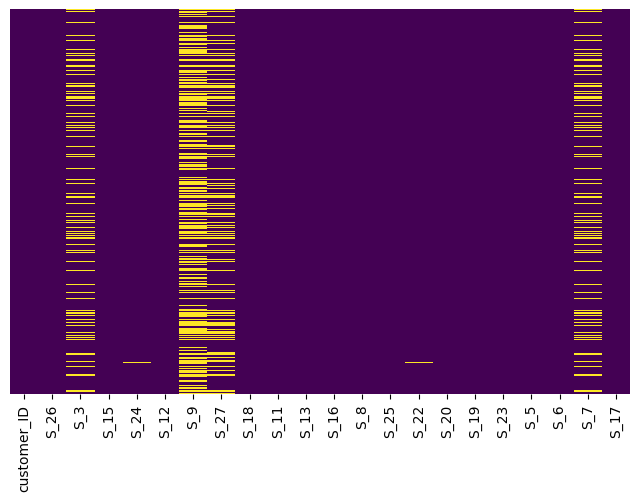

In [ ]:
#Visualizar los valores nulos
plt.figure(figsize=(8, 5))
sns.heatmap(df_train.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


Como se puede apreciar las variables
*       S_3  18.449843
*       S_9  53.035686
*       S_27 25.326718
*       S_7  18.449843

Tienen demasiado valores faltantes por lo que se quitara del analisis

In [ ]:
df_train.shape

(5531451, 22)

In [ ]:
df_train_f = df_train.drop(["S_3", "S_9", "S_27","S_7"], axis=1)
# axis=1 indica que son columnas

In [ ]:
df_train_f.shape

(5531451, 18)

In [ ]:
#Vemos que aun tenemos valores faltantes
missing_percentage = df_train_f.isnull().sum() / len(df_train) * 100
print(missing_percentage)

customer_ID    0.000000
S_26           0.011462
S_15           0.000000
S_24           0.336132
S_12           0.000000
S_18           0.000000
S_11           0.000000
S_13           0.000000
S_16           0.000000
S_8            0.000000
S_25           0.232254
S_22           0.343924
S_20           0.000000
S_19           0.000000
S_23           0.008045
S_5            0.000000
S_6            0.000000
S_17           0.000000
dtype: float64


In [ ]:
# Se imputara por la media mediana o rango dependiendo del caso
def func_medidas(x:pd.Series):
  media = np.mean(x.dropna())
  mediana = np.median(x.dropna())
  std = np.std(x.dropna())
  cv = (std * 100 / media) if media != 0 else 100
  rango = (x.max() - x.min()) / 2
  if cv <= 30:
    valor_imputacion = media
  elif cv>30 and cv<=70:
    valor_imputacion = rango
  else:
     valor_imputacion = mediana
  return x.fillna(valor_imputacion)

In [ ]:
#Modificamos la Lista_s quitandole las variables eliminadas
eliminar = {"S_3", "S_9", "S_27","S_7"}

list_s =  [x for x in list_s if x not in eliminar]
print(list_s)

['S_26', 'S_15', 'S_24', 'S_12', 'S_18', 'S_11', 'S_13', 'S_16', 'S_8', 'S_25', 'S_22', 'S_20', 'S_19', 'S_23', 'S_5', 'S_6', 'S_17']


In [ ]:
df_train_med = df_train_f.groupby(['customer_ID'])[list_s].transform(func_medidas)
df_train_med.head(5)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,S_26,S_15,S_24,S_12,S_18,S_11,S_13,S_16,S_8,S_25,S_22,S_20,S_19,S_23,S_5,S_6,S_17
0,0.001243,0.108271,0.911191,0.272008,0.005720,0.401619,0.515222,0.002271,0.922998,0.974539,0.894090,0.009705,0.002537,0.135561,0.023381,0.008322,0.008033
1,0.004561,0.101018,0.919876,0.188970,0.007584,0.406326,0.509048,0.009810,0.919414,0.975624,0.902135,0.009924,0.008427,0.136333,0.030599,0.002482,0.000760
2,0.011736,0.103239,0.958699,0.495308,0.005901,0.406768,0.679257,0.009362,1.001977,0.974067,0.939654,0.008446,0.007327,0.134938,0.048367,0.000530,0.004056
3,0.007571,0.206394,0.926341,0.508670,0.002520,0.405175,0.515282,0.004876,0.704016,0.975499,0.913205,0.006614,0.007053,0.140058,0.030063,0.000783,0.006969
4,0.018200,0.106020,0.933479,0.216507,0.000155,0.487460,0.507712,0.007447,0.917133,0.978027,0.921026,0.005511,0.007728,0.131620,0.054221,0.006698,0.001770


In [ ]:
df_train_med = df_train_med.fillna(0)

In [ ]:
df_train_med.isnull().sum()

,0
S_26,0
S_15,0
S_24,0
S_12,0
S_18,0
S_11,0
S_13,0
S_16,0
S_8,0
S_25,0


Vemos que no tengo nulos y datos faltantes en el codigo

# 4. Análisis y visualización de los datos

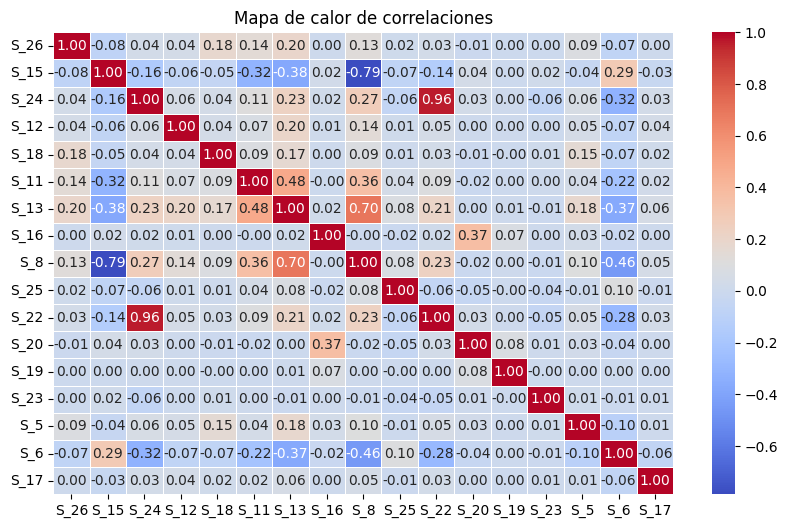

In [ ]:

# Calcular la matriz de correlación
corr_matrix = df_train_med.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Mapa de calor de correlaciones")
plt.show()


La grafica de correlacion muestra que la variable s_8 y s_15 estan altamente correlacionadas por lo que deberiamos quedarnos con una sola

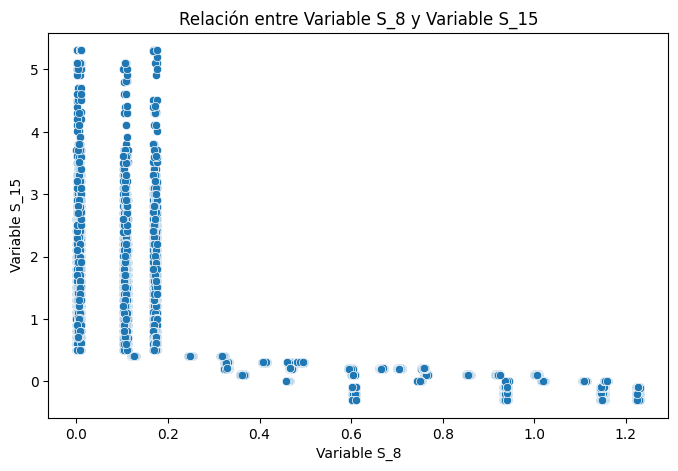

In [ ]:
# Scatterplot entre las variables altamente correlacionadas
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train_med['S_8'], y=df_train_med['S_15'])

plt.title("Relación entre Variable S_8 y Variable S_15")
plt.xlabel("Variable S_8")
plt.ylabel("Variable S_15")
plt.show()


Patrón no lineal: La relación entre S_8 y S_15 no es una línea recta clara, lo que sugiere que no hay una correlación fuerte entre ellas en la mayoría de los valores.

Se observan varios grupos de puntos en S_8, indicando que esta variable toma valores discretos o con alta repetición.

Para valores más grandes de S_8, S_15 se concentra cerca de 0.0 o valores muy bajos.

Esto indica una posible relación inversa no lineal: cuando S_8 es bajo, S_15 tiende a ser más alto, y viceversa.

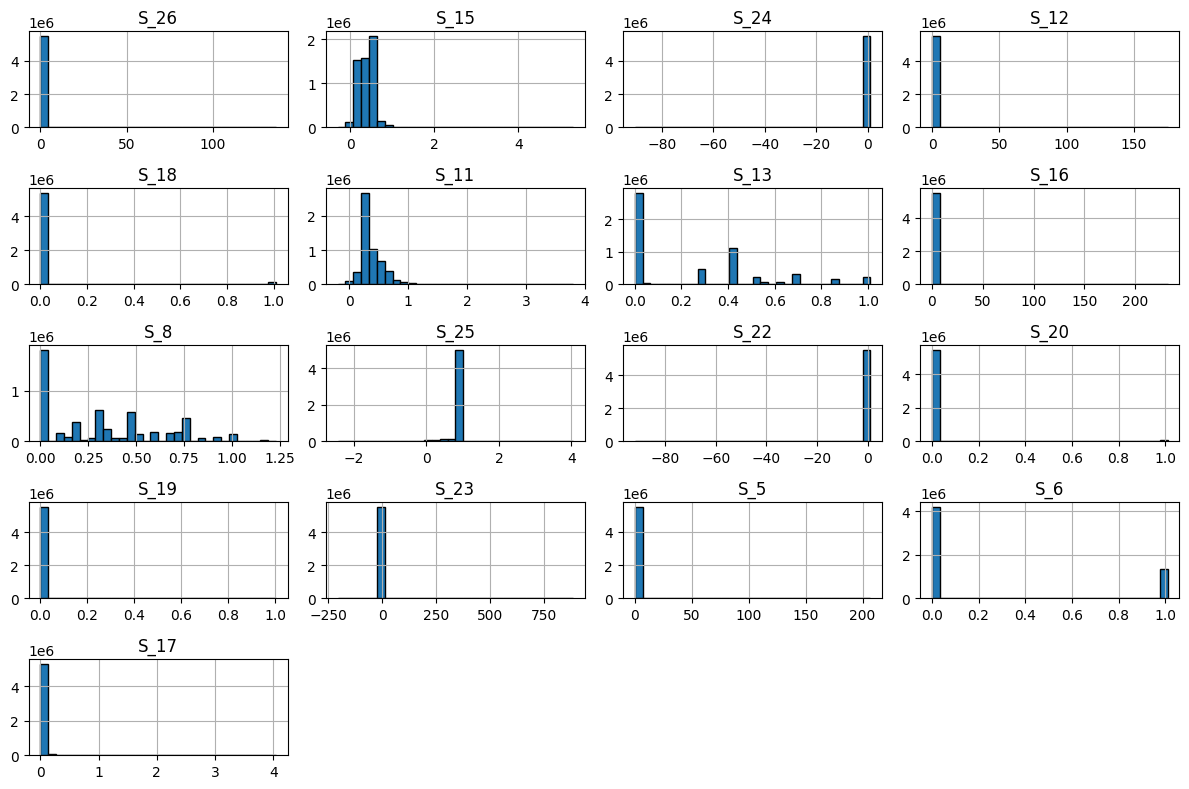

In [ ]:
# Hacemos un histograma para ver como se distribuye cada variable

df_train_med.hist(figsize=(12,8), bins=30, edgecolor='black')

# Mostrar gráficos
plt.tight_layout()
plt.show()


Vemos la siguiente distribucion en los datos


*   S_26 S_24 S_12 S_18 S_16 S_22 S_20 S_19 S_23 y S_5  todos son valores 0 o cercanos a 0
*   La variable S_6 parece ser categorica o semi discreta



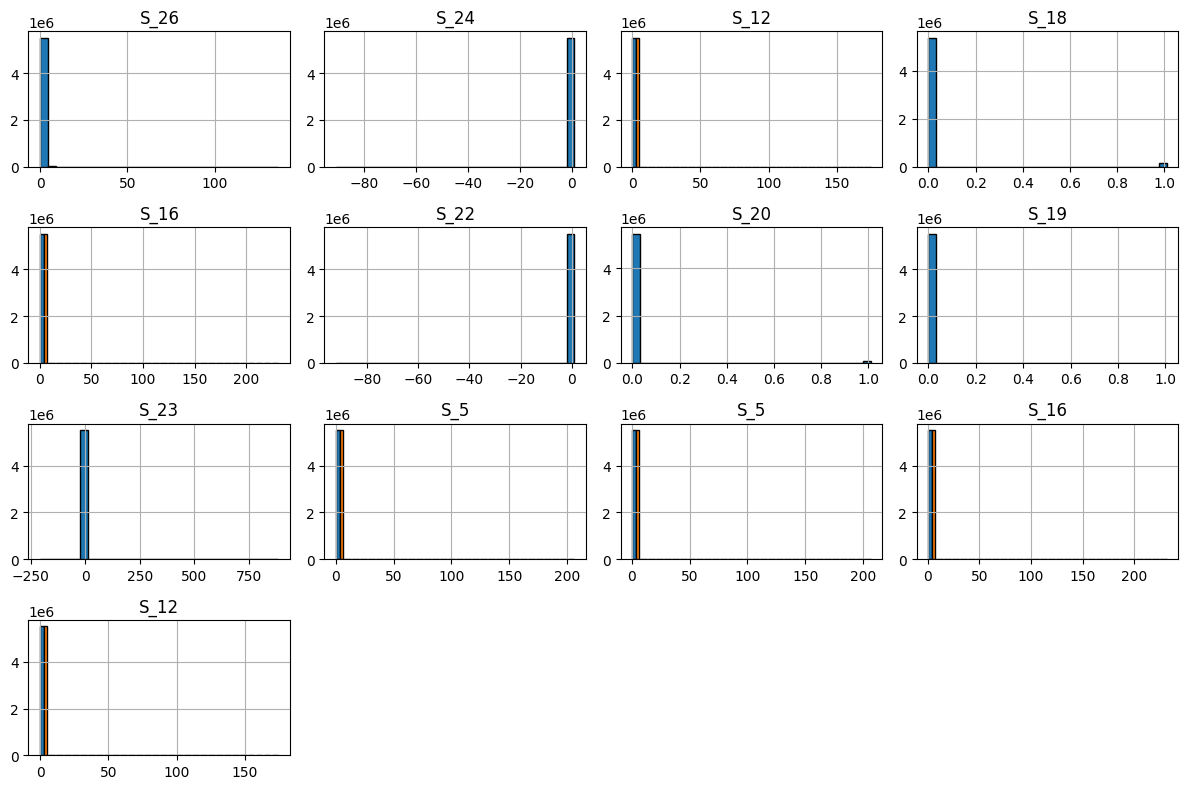

In [ ]:
column = ['S_26', 'S_24', 'S_12', 'S_18', 'S_16', 'S_22', 'S_20', 'S_19', 'S_23', 'S_5', 'S_5', 'S_16', 'S_12']
df_train_med[column].hist(figsize=(12,8), bins=30, edgecolor='black')

# Mostrar gráficos
plt.tight_layout()
plt.show()

# 5. Manejo de Outliers

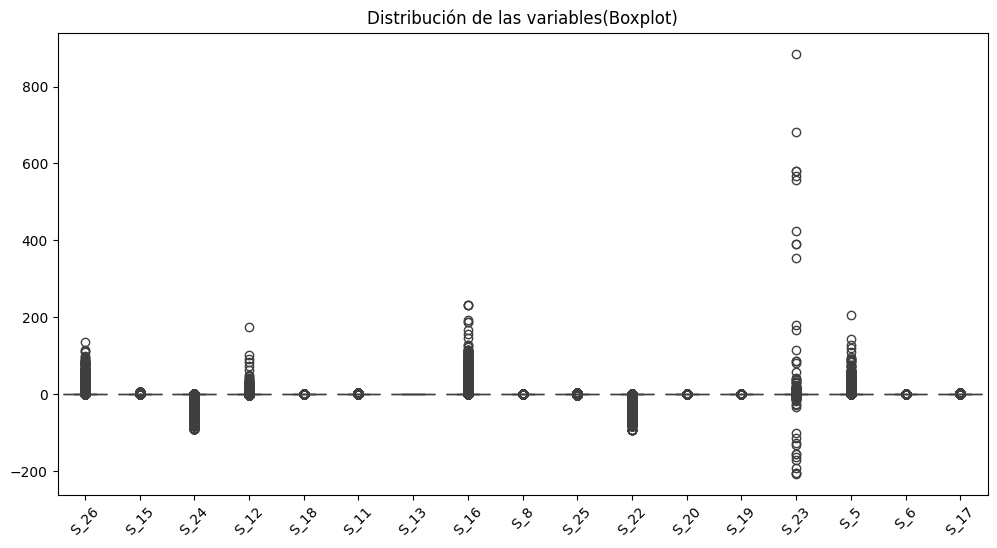

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12,6))

# Crear el boxplot para todas las columnas numéricas
sns.boxplot(data=df_train_med)

# Rotar etiquetas en caso de muchas variables
plt.xticks(rotation=45)

plt.title("Distribución de las variables(Boxplot)")
plt.show()


vemos que las variable con mas outlier es la s_23 seguido de la s_5 s_16 y s12. Con pocos ouliers tenemos la s_26

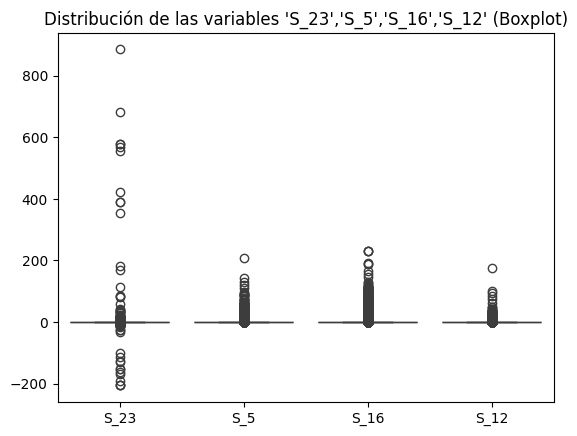

In [ ]:
columnas = ['S_23', 'S_5', 'S_16', 'S_12']
sns.boxplot(data=df_train_med[columnas])
plt.title("Distribución de las variables 'S_23','S_5','S_16','S_12' (Boxplot)")
plt.show()

# 6. Reduccion de variables

Segun lo que se ha observado hay variables que es posible que no sean relevantes para el modelo o causen mucho ruido por tener ya sea un solo valor o cercano a un unico valor se tratara de la siguiente manera las variables


*   S_26 S_24 S_12 S_18 S_16 S_22 S_20 S_19 y S_23  por tener valores 0 o cercanos a 0
*   La variable S_23 se elimina por la gran cantidad de outiliers



In [ ]:

df_train_med_f = df_train_med.drop(["S_26","S_24","S_12","S_18","S_16","S_22","S_20","S_19","S_23","S_5"], axis=1)

In [ ]:
df_train_med_f.head()

,S_15,S_11,S_13,S_8,S_25,S_6,S_17
0,0.108271,0.401619,0.515222,0.922998,0.974539,0.008322,0.008033
1,0.101018,0.406326,0.509048,0.919414,0.975624,0.002482,0.000760
2,0.103239,0.406768,0.679257,1.001977,0.974067,0.000530,0.004056
3,0.206394,0.405175,0.515282,0.704016,0.975499,0.000783,0.006969
4,0.106020,0.487460,0.507712,0.917133,0.978027,0.006698,0.001770


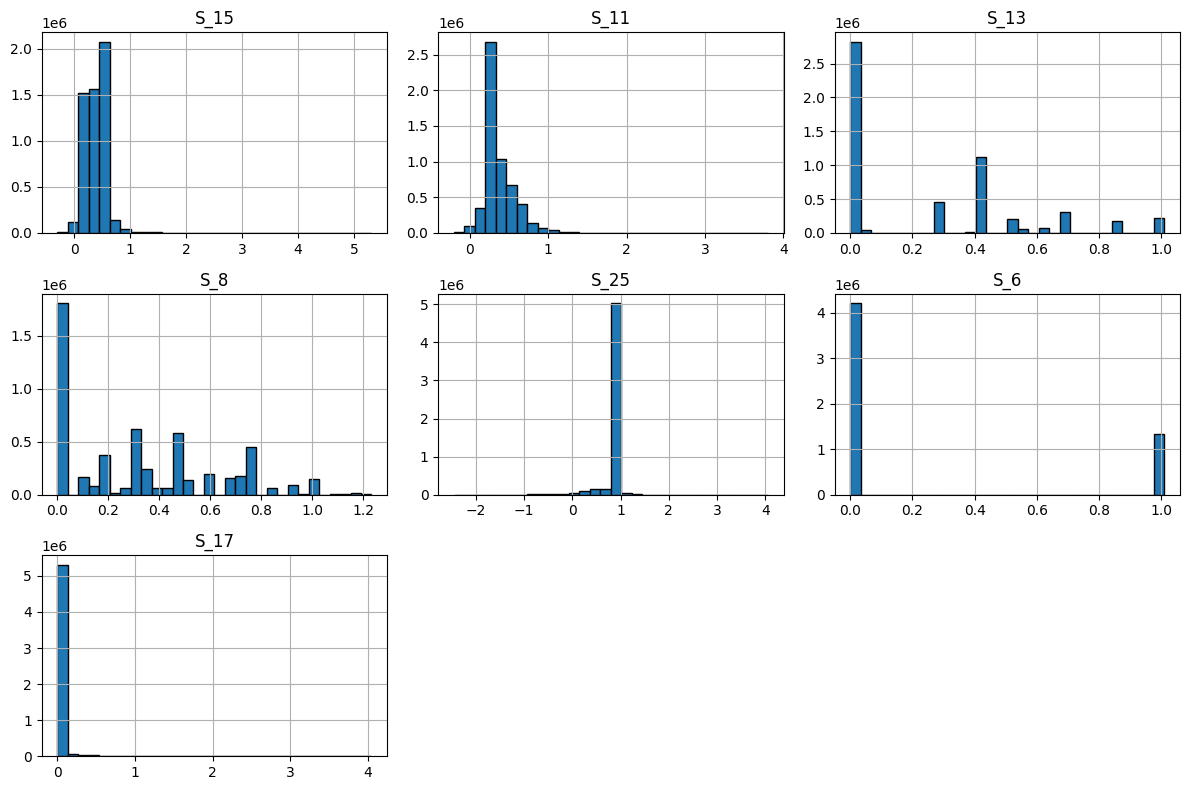

In [ ]:
#Revisamos nuevamente el histograma
df_train_med_f.hist(figsize=(12,8), bins=30, edgecolor='black')

# Mostrar gráficos
plt.tight_layout()
plt.show()

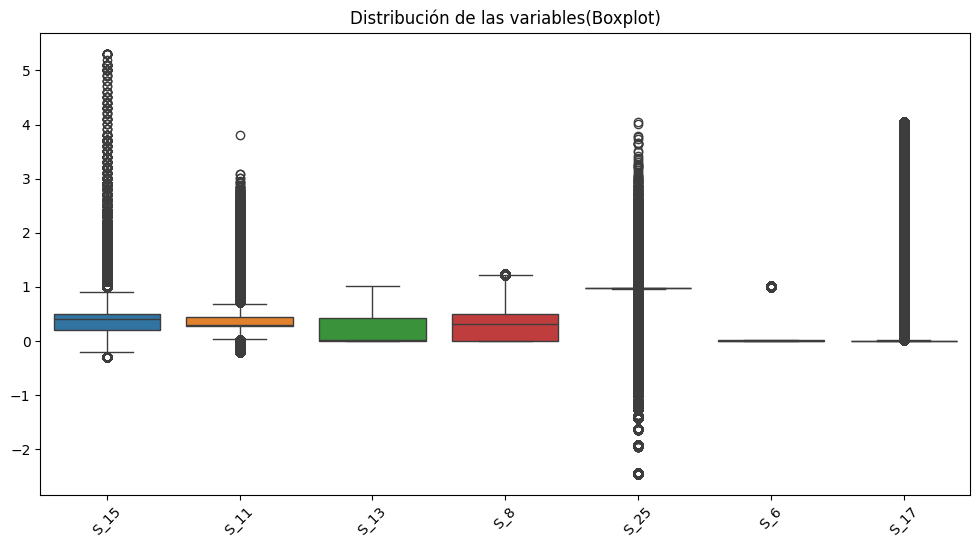

In [ ]:
#Probamos los outliers
# Ajustar el tamaño de la figura
plt.figure(figsize=(12,6))

# Crear el boxplot para todas las columnas numéricas
sns.boxplot(data=df_train_med_f)

# Rotar etiquetas en caso de muchas variables
plt.xticks(rotation=45)

plt.title("Distribución de las variables(Boxplot)")
plt.show()

Vemos que aun varias variables con outliers pero en este caso imputaremos esos ouliers con la media o mediana

In [ ]:

def tabla_outliers(df):
    datos_outliers = []

    for col in df.select_dtypes(include=np.number).columns:  # Solo variables numéricas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar valores fuera del rango
        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

        # Agregar datos a la lista
        datos_outliers.append([col, num_outliers, lower_bound, upper_bound])

    # Convertir a DataFrame
    tabla = pd.DataFrame(datos_outliers, columns=["Variable", "Outliers", "Límite Inferior", "Límite Superior"])

    return tabla.sort_values(by="Outliers", ascending=False)  # Ordenar de mayor a menor



In [ ]:
tabla_outliers(df_train_med_f)

,Variable,Outliers,Límite Inferior,Límite Superior
5,S_6,1323080,-0.006575,0.019719
4,S_25,598053,0.962448,0.984896
1,S_11,403902,0.032967,0.698239
6,S_17,370698,-0.005360,0.016096
0,S_15,61472,-0.238376,0.950760
3,S_8,2611,-0.723292,1.225874
2,S_13,0,-0.629344,1.061958


In [ ]:
#eliminados los outliers
import pandas as pd
import numpy as np

def eliminar_outliers(df, columna_excluida):
    df_filtrado = df.copy()  # Copia del DataFrame original

    for col in df.select_dtypes(include=np.number).columns:
        if col != columna_excluida:  # Excluir la columna específica
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar valores dentro de los límites
            df_filtrado = df_filtrado[(df_filtrado[col] >= lower_bound) & (df_filtrado[col] <= upper_bound)]

    return df_filtrado




In [ ]:
# Exceptuamos la variable S_6 por que estamos suponiendo que es categorica
columna_a_excluir = 'S_6'
df_sin_outliers = eliminar_outliers(df_train_med_f, columna_a_excluir)


In [ ]:
# Verificar diferencias
print("Tamaño original:", df_train_med_f.shape)
print("Tamaño sin outliers:", df_sin_outliers.shape)

Tamaño original: (5531451, 7)
Tamaño sin outliers: (4250957, 7)


Nos estamos quedando con 4,250,957 de 5,531,451

# 7. Conclusiones e Insights

In [ ]:
df_sin_outliers['S_6_C'] = df_sin_outliers['S_6'].astype('category')


In [ ]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250957 entries, 0 to 5531450
Data columns (total 8 columns):
 #   Column  Dtype   
---  ------  -----   
 0   S_15    float64 
 1   S_11    float64 
 2   S_13    float64 
 3   S_8     float64 
 4   S_25    float64 
 5   S_6     float64 
 6   S_17    float64 
 7   S_6_C   category
dtypes: category(1), float64(7)
memory usage: 437.1 MB


Estas serian las variables atomar en cuenta para un modelo de datos, tomar la variables S_6_C